In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing Data
spam =pd.read_csv('spam.csv',encoding='latin 1')

In [3]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# check the rows and column
spam.shape

(5572, 5)

# Step to create model
1. Data Cleaning
2. EDA
3. Text PreProcessing
4. Model Building
5. Model Evaluation
6. Model Improvement
7. Convert to Website
8. Deployment

# Data Cleaning

In [5]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
# we are renaming the column
spam.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
spam.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
spam['target'] = spam['target'].map({'ham':0,'spam':1})

In [11]:
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing value
spam.isna().sum()

target    0
text      0
dtype: int64

In [13]:
# duplicate value
spam.duplicated().sum()

403

In [14]:
# remove duplicated
spam = spam.drop_duplicates(keep='first')
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
spam.duplicated().sum()

0

In [16]:
spam.shape

(5169, 2)

# 2. EDA

In [17]:
spam.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

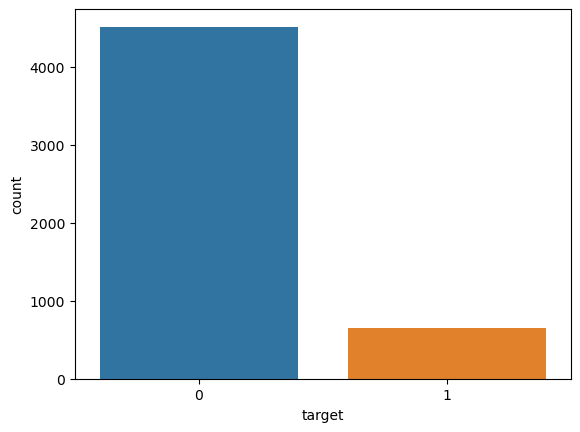

In [18]:
sns.countplot(spam['target'])

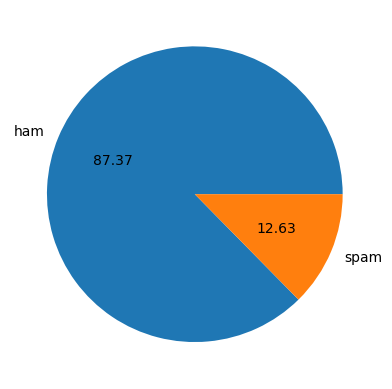

In [19]:
plt.pie(spam['target'].value_counts(),labels=['ham','spam'],autopct=('%0.2f'))
plt.show()

In [20]:
# data is imbalance

In [21]:
import nltk # nltk is a natinal language toolkit
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\sanjana
[nltk_data]     pal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
spam['num_character'] = spam['text'].apply(len)

In [23]:
spam['num_word'] = spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))
spam['num_sentence'] = spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
spam.head()

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
spam.describe()

,target,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


<AxesSubplot:xlabel='num_character', ylabel='Count'>

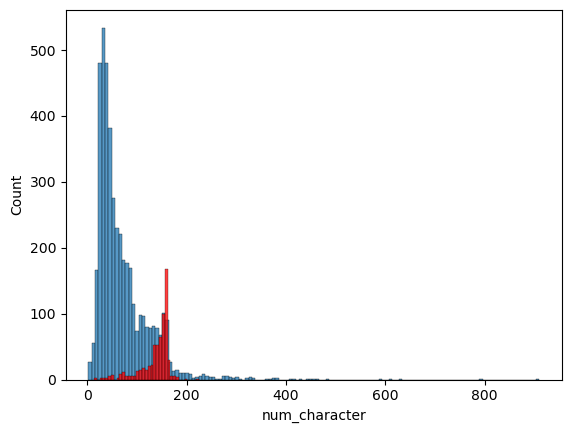

In [26]:
sns.histplot(spam[spam['target']==0]['num_character'])
sns.histplot(spam[spam['target']==1]['num_character'],color='red')

<AxesSubplot:xlabel='num_word', ylabel='Count'>

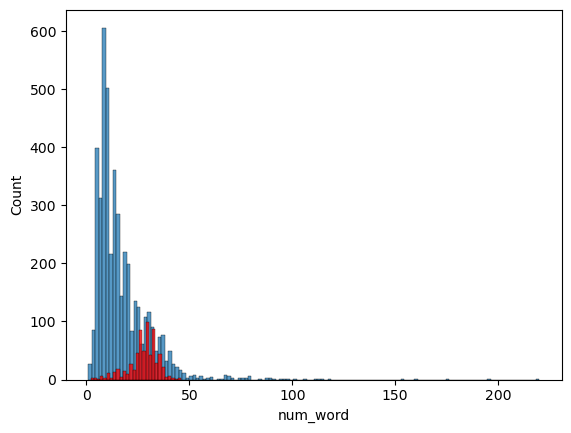

In [27]:
sns.histplot(spam[spam['target']==0]['num_word'])
sns.histplot(spam[spam['target']==1]['num_word'],color='red')

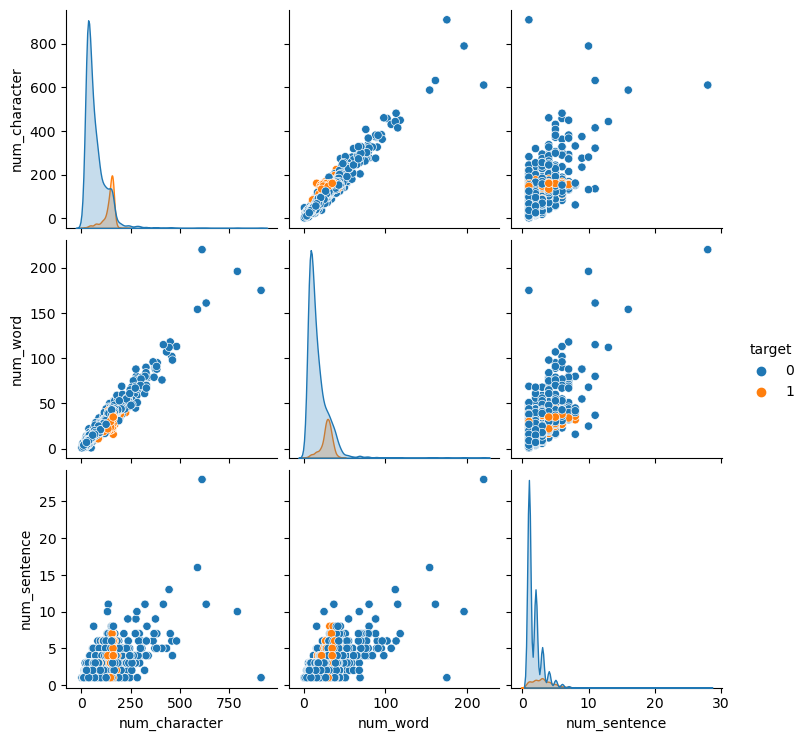

In [28]:
sns.pairplot(spam,hue='target')

<AxesSubplot:>

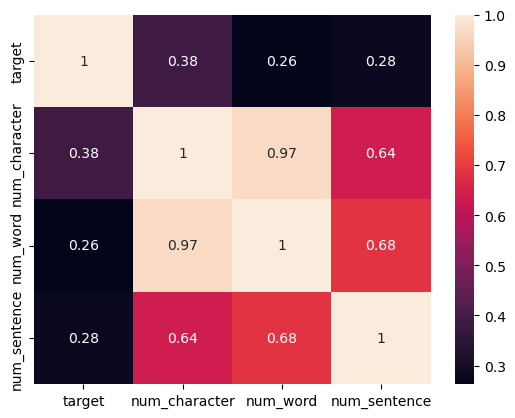

In [29]:
sns.heatmap(spam.corr(),annot=True)

# 3.Data Preprocessing

Lower case
tokenization
Removing special character
Removing stop words and punctuation
Stemming

In [30]:
from nltk.corpus import stopwords
import string 

In [31]:

nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\sanjana
[nltk_data]     pal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]# cloning of y means all the y values putting in text.
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
    

In [34]:
transform_text('i loved the YT lectures  on machine Learning')

'love yt lectur machin learn'

In [35]:
spam['transform_text'] = spam['text'].apply(transform_text)

In [36]:
spam.head()

,target,text,num_character,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
# wordcloud
from wordcloud import WordCloud
wc = WordCloud(background_color='white')
spam_wc = wc.generate(spam[spam['target']==1]['transform_text'].str.cat(sep=" "))

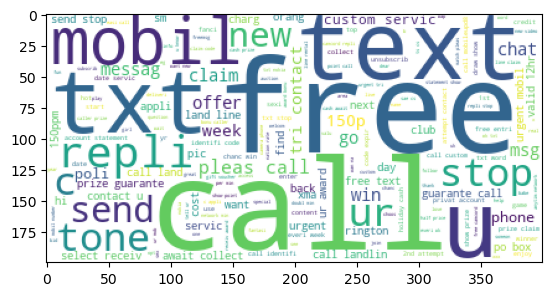

In [38]:
plt.imshow(spam_wc)

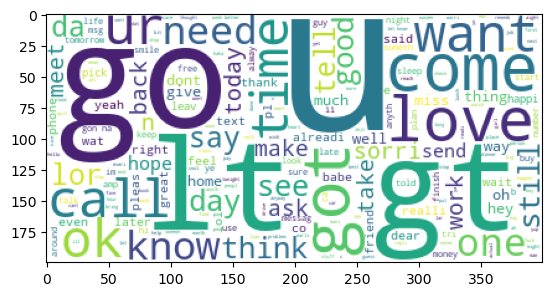

In [39]:
ham_wc = wc.generate(spam[spam['target']==0]['transform_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [40]:
# Visualisation of top spam and ham words

In [41]:
spam_corpus =[]
for msg in spam[spam['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

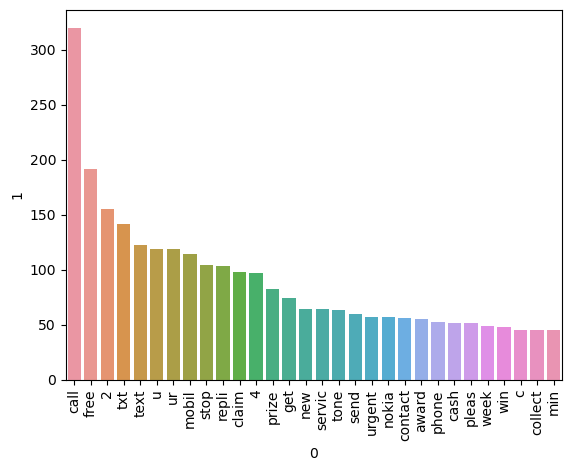

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
ham_corpus =[]
for msg in spam[spam['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)



In [44]:
len(ham_corpus)

35394

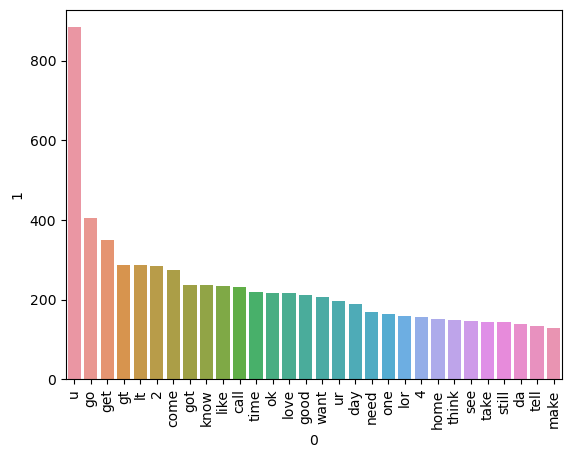

In [45]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer() # to convert the words into vectors using bow
tfidf = TfidfVectorizer(max_features=3000) # tfidf vectorizer is used with maximum features 3000

In [47]:
x =tfidf.fit_transform(spam['transform_text']).toarray() # it is an sparse array but we are converting into dense array

In [48]:
x.shape

(5169, 3000)

In [49]:
y = spam['target'].values

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [51]:

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [52]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
y = nb.predict(xtest)

In [53]:
nb.score(xtrain,ytrain),nb.score(xtest,ytest)

(0.9765063571033721, 0.9754996776273372)

In [54]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1355
           1       1.00      0.81      0.89       196

    accuracy                           0.98      1551
   macro avg       0.99      0.90      0.94      1551
weighted avg       0.98      0.98      0.97      1551



In [55]:
import pickle
pickle.dump(tfidf,open('vectorised.pkl','wb'))
pickle.dump(nb,open('model.pkl','wb'))

In [56]:
spam['transform_text'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'